This is a simple analysis on the difference between male and female workers within their various features available in this dataset.

For this notebook, we want to determine the difference of income features between male and female. We will look into the various single-featured comparison and bi-variate distribution of dataset features. By analysing in this way, we want to also determine if there are any unfairness or imbalance between male and female work income. Besides that, we will also look into the upper and lower income distribution comparison between income features. We will also test a hypothesis of whether women above the age of 30 tend to prioritize family over work.

# GDrive Connection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "drive/MyDrive/SpringBoard/Chapter/Unit 20 Data Storytelling/20.3 Apply your storytelling skills/20.3.2 Craft a story from a Dataset"

/content/drive/MyDrive/SpringBoard/Chapter/Unit 20 Data Storytelling/20.3 Apply your storytelling skills/20.3.2 Craft a story from a Dataset


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('adult_income.csv')

# Getting Overview of dataset

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Firstly, get an overview of the dataset. The dataset seems to be uniform  with no null values, and appropriate date types. However, getting a closer look at the first 5 rows of dataset shows that there are some values which do not mean anything such as the '?' in the 5th row of workclass and occupation column. Since these values appear in object data types columns, we need to consult the source of the dataset to figure out whether to replace the value with a meaningful value or exclude these values entirely in our analysis.

### Taking a sneak peak at the income column.

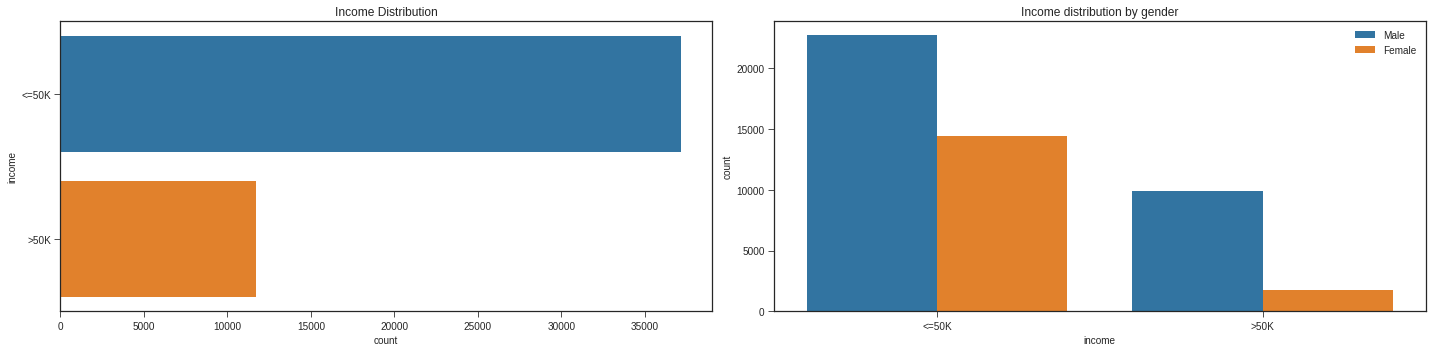

In [7]:
# Visualization of income distribution by gender
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')

plt.subplot(1, 2, 1)
sns.countplot(y="income", data=df)
plt.title('Income Distribution')

plt.subplot(1, 2, 2)
x, hue = "income", "gender"
sns.countplot(x=x, hue=hue, data=df)
plt.title('Income distribution by gender')
plt.legend()
plt.tight_layout()
plt.show()

The income level for this dataset shows a skewed binning of income level at cutoff point of 50k annually. Visually, the majority of adults in this dataset are to be considered low income. There is also a higher percentage of male with higher income level compared to female.

### Education

In [8]:
# Classifying education level to appropriate terms
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'Community_College',inplace=True)
df['education'].replace('Assoc-acdm', 'Community_College',inplace=True)
df['education'].replace('Assoc-voc', 'Community_College',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [9]:
# Population of education level
df[['education', 'educational-num']].groupby(['education'], as_index=False).count().sort_values(by='educational-num', ascending=False)

,education,educational-num
3,HighGrad,15784
1,Community_College,14540
0,Bachelors,8025
5,dropout,6408
4,Masters,3491
2,Doctorate,594


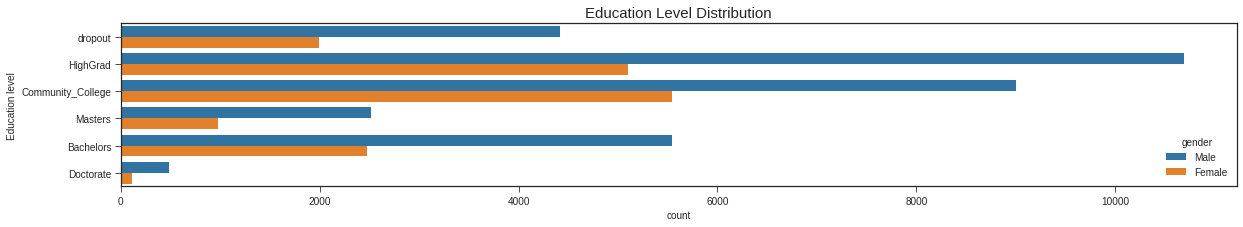

In [10]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')

sns.countplot(y="education", hue='gender', data=df)
plt.title('Education Level Distribution',fontsize=15)
plt.ylabel('Education level')
plt.show()

Looking at the level of education distribution, the amount of highschool and community college graduates. The dataset also shows a male dominant market with a much higher population of male in each education level.

### Maritial Status

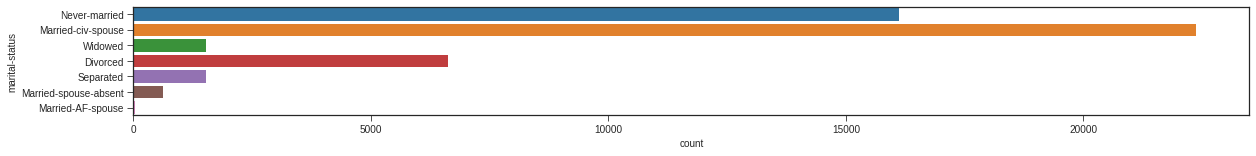

In [11]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=df)

### Occupation

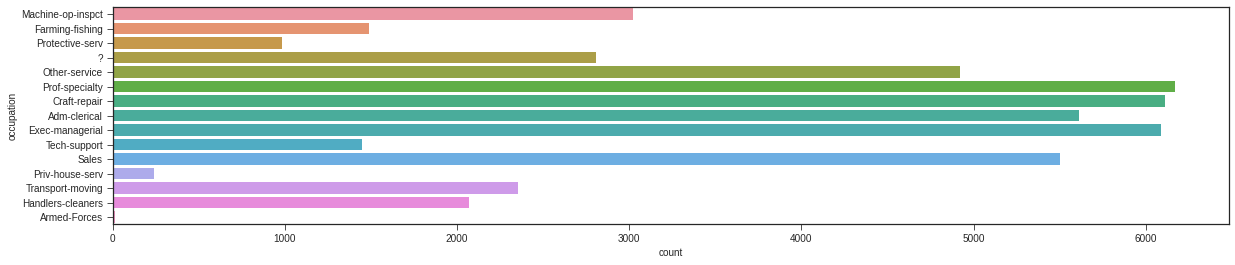

In [12]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)

### Workclass

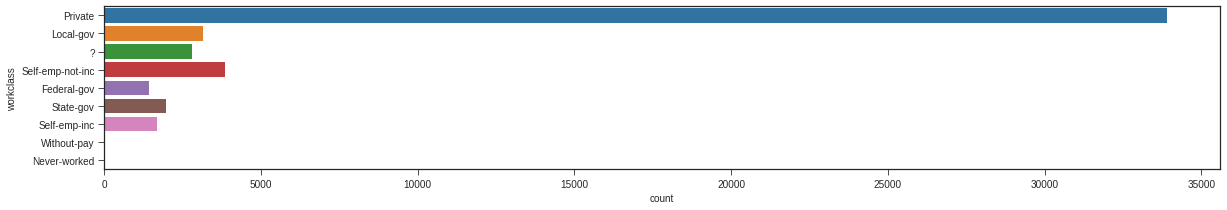

In [13]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=df)

### Income-age

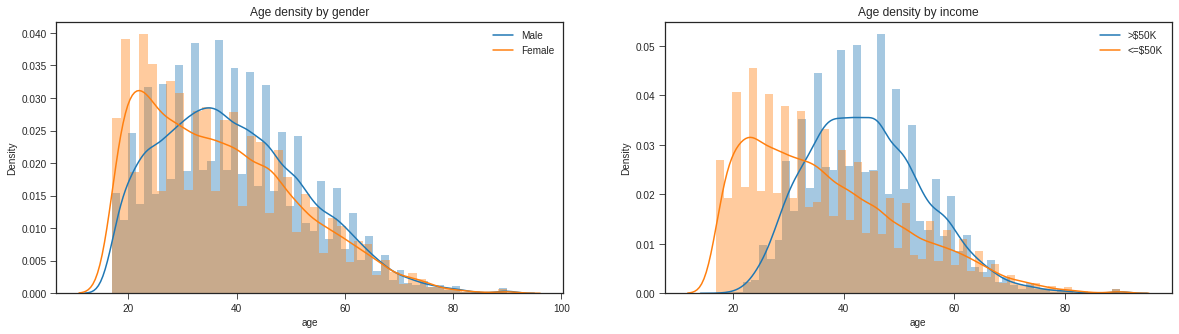

In [14]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.distplot(df[df['gender'] == 'Male']['age'], kde_kws={"label": "Male"})
sns.distplot(df[df['gender'] == 'Female']['age'], kde_kws={"label": "Female"})
plt.legend()
plt.title('Age density by gender')

plt.subplot(1, 2, 2)
sns.distplot(df[df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})
plt.legend()
plt.title('Age density by income')
plt.show()

The first graph shows that below the age of 30 there are more female working but above the age of 30 male dominates the working industries. Based on this analysis, a hypothesis can be made: Above the age of 30 females tend to prioritize family over work life and therefore the number of males working are significantly more than the female above the age of 30.

The right graph clearly shows that the lower income bracket consists of people who are younger, with mean range between 20-30; vice versa the higher income bracket consists of people who are older, with mean range between 30-50.   

### Race-gender

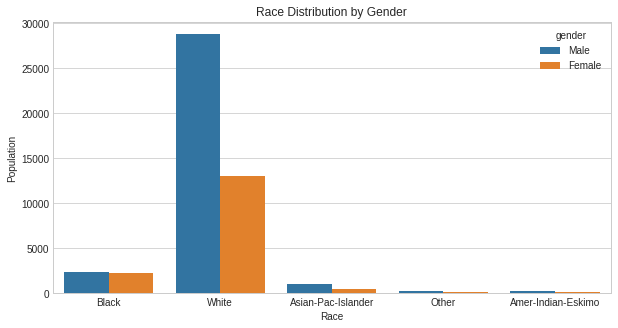

In [15]:
plt.style.use('seaborn-whitegrid')
x, hue = "race", "gender"
plt.figure(figsize=(10,5)) 
sns.countplot(x=x, hue=hue, data=df)
plt.title('Race Distribution by Gender')
plt.xlabel('Race')
plt.ylabel('Population')
plt.show()

Looking at this graph, it can be said that this dataset is very skewed towards income by races. The large majority of this dataset is populated by 'White' race, while the rest of the races follows up with below 2500 people respectively.

### Hours per week of work

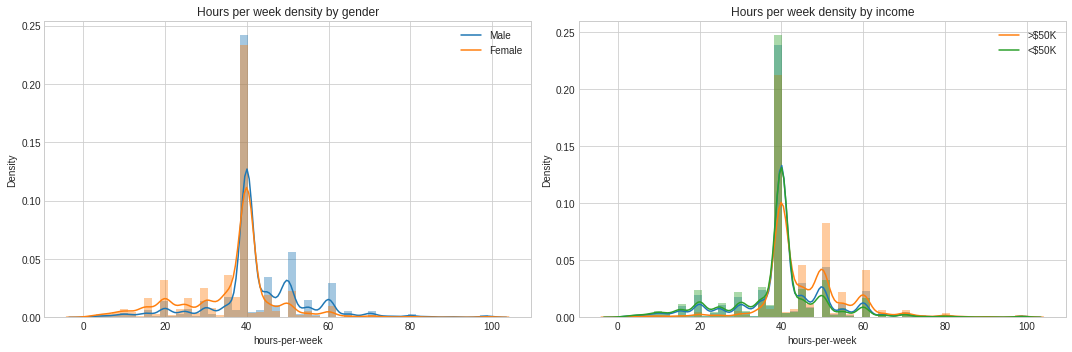

In [16]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5)) 

plt.subplot(1, 2, 1)
sns.distplot(df[df['gender'] == 'Male']['hours-per-week'], kde_kws={"label": "Male"})
sns.distplot(df[df['gender'] == 'Female']['hours-per-week'], kde_kws={"label": "Female"})
plt.legend()
plt.title('Hours per week density by gender')

plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.legend()
plt.title('Hours per week density by income')
plt.tight_layout()
plt.show()

The left graph illustrates the hours per week spent by both male and female workers. Focusing on the first half of the graph, the majority of female (orange) workers spend less than or equal to 40 hours per week; while the majority of male (blue) workers spend a lot more than 40 hours per week. 

The right graph shows that the higher income bracket spends a lot more hours per week at work compared to the lower income bracket people. Thus, we can hypothesiszed that the higher income bracket people spend more hours per week working than the lower income bracket. 

### Lifetime total hours of work

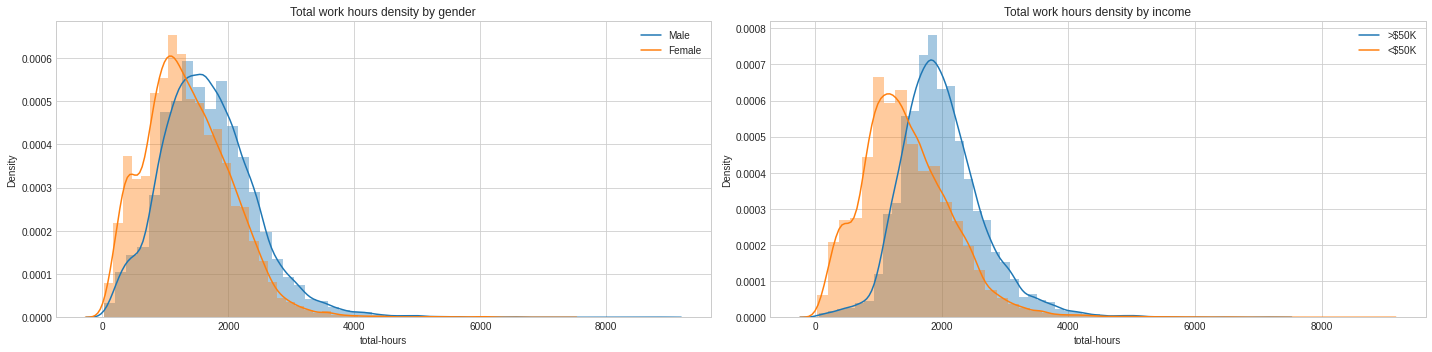

In [17]:
# Total hours of work
df['total-hours'] = df['age']*df['hours-per-week']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 

plt.subplot(1, 2, 1)
sns.distplot(df[df['gender'] == 'Male']['total-hours'], kde_kws={"label": "Male"})
sns.distplot(df[df['gender'] == 'Female']['total-hours'], kde_kws={"label": "Female"})
plt.legend()
plt.title('Total work hours density by gender')

plt.subplot(1, 2, 2)
sns.distplot(df[df['income'] == '>50K']['total-hours'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['total-hours'], kde_kws={"label": "<$50K"})
plt.legend()
plt.title('Total work hours density by income')
plt.tight_layout()
plt.show()

Comparing between the male and female workers, the male workers have a tendency to spend more hours in total at work compared to female. 

By now it should be clear that there is a correlation between the income bracket and the number of hours spent working in total. The right graph clearly demonstrates that the higher income bracket spend significantly more hours at work than lower income bracket people.

Combining information from these 2 graphs, we can hypothesized that the majority of workers in the higher income bracket are male and have a higher acuumulative work hours.

# Conclusion

In conclusion, the amount of hours spend at work has a high correlation to the income bracket. The difference between male and female are also significant in terms of hours spend per week, mean age group, income bracket, and education level. For most of the features, the male tends to dominate the market in above the age of 30.